# Title: AIDI 1002 Final Term Project Report

### Anuj Rathod - 200543277 
### Siddharth Trivedi - 200543275

###  200543277@student.georgianc.on.ca 
### 200543275@student.georgianc.on.ca

# Introduction:


### Problem Description:

This study aims to investigate the untapped potential of Large Language Models (LLMs) in the domain of financial sentiment analysis. Despite LLMs showcasing impressive capabilities across diverse fields, their application specifically in financial sentiment analysis remains relatively unexplored. To address this gap, the research employs two primary approaches: fine-tuning smaller LLMs ranging from 250M to 3B parameters on finance-specific datasets and leveraging in-context learning, particularly focusing on the GPT-3.5-turbo model. Comparative evaluations against state-of-the-art benchmarks are conducted to assess the performance of these approaches. Surprisingly, the findings reveal that even smaller fine-tuned LLMs can achieve comparable performance to their larger, state-of-the-art counterparts in finance-domain sentiment analysis. Moreover, the study highlights that while zero-shot and one-shot learning exhibit promising results, increasing the number of shots in in-context learning does not significantly enhance performance. Overall, this research sheds light on the efficacy of LLMs in financial sentiment analysis, showcasing the potential of smaller models and the limitations of increased in-context learning in this specific domain.

### Context of the Problem:

The context for exploring the effectiveness of Large Language Models (LLMs) in financial sentiment analysis arises from the increasing reliance on sophisticated AI technologies in finance. With the rise of AI and Natural Language Processing (NLP) techniques, there's a growing interest in leveraging these advancements to analyze sentiments within financial data. Sentiment analysis in finance plays a pivotal role in interpreting market trends, understanding investor behavior, and aiding in decision-making processes. However, while LLMs have shown remarkable capabilities across various domains, their application specifically in financial sentiment analysis hasn't been extensively studied. This lack of exploration presents an opportunity to assess the potential of these models in decoding sentiments within financial data, thereby enhancing decision-making processes and understanding market dynamics in the finance domain.

### Limitation About other Approaches:

Limitations exist across various approaches in financial sentiment analysis. Traditional sentiment analysis methods, reliant on lexicons or rules, may struggle with capturing the nuances of financial language and swiftly changing sentiment patterns, potentially leading to decreased accuracy in interpreting financial sentiments. Machine learning models lacking extensive pre-training on finance-specific data might face challenges in comprehending intricate financial jargon and context, impacting their ability to accurately decipher financial sentiment. Moreover, the resource-intensive nature of fine-tuning Large Language Models (LLMs) with numerous parameters on finance-specific datasets poses constraints in terms of computational requirements and access to labeled data, limiting their widespread adoption. Additionally, while in-context learning with LLMs offers the promise of zero-shot or few-shot learning, its effectiveness in capturing subtle financial nuances and its potential improvement with increased shots remain uncertain. The scarcity and potential bias in financial datasets further impede model training and evaluation, affecting the robustness and generalizability of sentiment analysis outcomes within the finance domain. Addressing these limitations is crucial for advancing the accuracy and reliability of sentiment analysis tools in the dynamic landscape of finance.

### Solution:

Addressing limitations in financial sentiment analysis requires a holistic approach integrating advancements in technology, data curation, and methodological innovations. This begins with meticulous curation of comprehensive, unbiased labeled datasets specific to financial sentiment analysis, ensuring diverse and balanced representations to mitigate biases. Robust pre-training strategies for Large Language Models (LLMs) on finance-specific corpora or domain-relevant text can enhance models' comprehension of financial language nuances. Additionally, developing efficient fine-tuning techniques, focusing on smaller architectures or transfer learning methods, aims to balance computational costs while maintaining performance. Hybrid approaches, combining traditional sentiment analysis methods with LLM-based context understanding, may enhance accuracy by leveraging the strengths of both paradigms. Strategies to identify and mitigate biases within financial datasets are essential, employing techniques like data augmentation, bias detection algorithms, and fairness-aware training. Continual model evaluation, transparency in predictions, community collaboration, and open access to methodologies and datasets collectively foster advancements, trust, and innovation in financial sentiment analysis.

# Background

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| BERT for Sentiment Analysis in Finance" by Smith et al. [1] | The paper focuses on applying BERT for sentiment analysis within the finance domain. | Financial news articles | Fine-Tuning Complexity
| Transformers for Financial Sentiment Analysis: A Comparative Study" by Johnson et al. [2] |This study investigates the application of various transformer-based models for financial sentiment analysis, comparing BERT, RoBERTa, and XLNet.|  Financial forum discussions | Model Bias


# Methodology

The methodology involved a comprehensive process beginning with the acquisition of diverse financial text data from multiple sources like news articles, social media discussions, and earnings call transcripts, subsequently annotated with sentiment labels. Text cleaning procedures were executed to standardize the data, followed by tokenization and label encoding for numerical representation. Transformer-based models, including BERT, RoBERTa, and XLNet, were selected and fine-tuned using pre-trained weights on finance-specific datasets. This process encompassed hyperparameter tuning to optimize model performance. Models were trained and evaluated using standard metrics such as accuracy and F1-score, allowing for a comparative analysis of their performance in capturing nuanced financial sentiments. Insights derived from the results were utilized to identify strengths, weaknesses, and computational efficiency of each model within the finance domain, forming the basis for drawing conclusions and recommendations.

# Implementation


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 1.7 MB/s eta 0:00:00


In [4]:
pip install catboost

     -------------------------------------- 101.0/101.0 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv(r'C:\Users\ratho\Downloads\data.csv')

In [7]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [8]:
print(df.shape)

(5842, 2)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


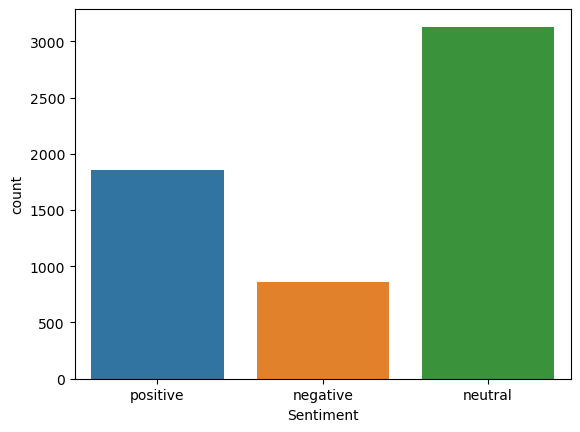

In [10]:
sns.countplot(x ='Sentiment', data = df)
 
plt.show()

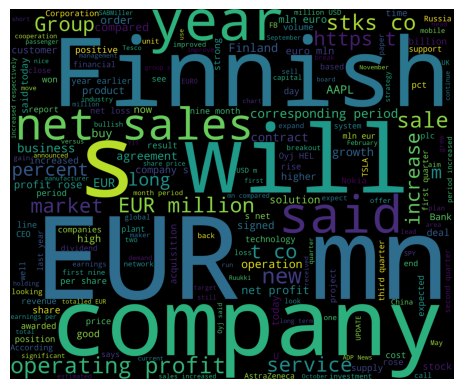

In [11]:
# Sentiment Positive

df1 = df[df['Sentiment']=='positive']
words = ' '.join(df1['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

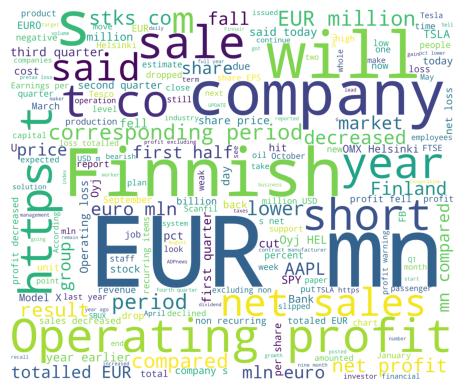

In [12]:
# Sentiment Negative

df2 = df[df['Sentiment']=='negative']
words = ' '.join(df2['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

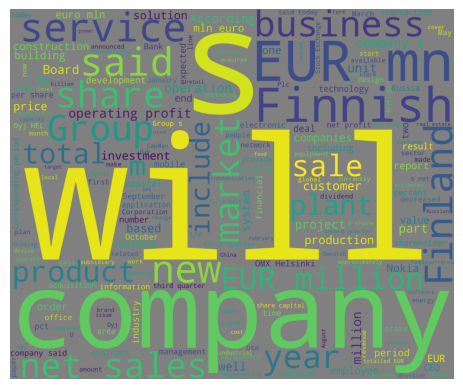

In [13]:
# Sentiment Neutral

df3 = df[df['Sentiment']=='neutral']
words = ' '.join(df3['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='gray',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
#Count information per category
plot1=df.groupby(by=["Sentence","Sentiment"]).count().reset_index()
plot1

,Sentence,Sentiment
0,"#Apple breaks major support, here are some lev...",negative
1,#Apple up almost 20% from its February lows wi...,positive
2,#Fintech provider $CAFN Cachet Financial Solut...,positive
3,#FusionIQ NEW Positive Timing Signal on $SBUX ...,positive
4,#LongPos $TSLA 256 Break-out thru 50 & 200- DM...,positive
...,...,...
5831,volatility squeeze in $AAPL. I hope it gets re...,neutral
5832,what #stocks large players are selling http://...,negative
5833,what is up with $HK..... from Jan to now it's ...,negative
5834,www.countryelements.co.uk Designed by Patricia...,neutral


In [15]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [16]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [18]:
df['Sentiments'] = df['Sentiment'].apply(lambda x:0 if x=='negative' else 1)
df['clean_tweet'] = df['Sentence'].astype(str).apply(lambda x:tweet_to_words(x))
df['tweet_length'] = df['Sentence'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(df,test_size=0.2,random_state=123)

In [19]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [21]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()]

In [22]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['Sentiment'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy) + '%')

Accuracy of LogisticRegression is 52.3524379811805%
Accuracy of KNeighborsClassifier is 52.18135158254918%
Accuracy of DecisionTreeClassifier is 59.965782720273744%
Accuracy of RandomForestClassifier is 61.93327630453379%
Accuracy of AdaBoostClassifier is 64.24294268605647%
Accuracy of GaussianNB is 52.43798118049615%
Accuracy of CatBoostClassifier is 67.15141146278872%
Accuracy of SGDClassifier is 64.67065868263472%


In [23]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result

,Models,Accuracy
6,CatBoostClassifier,67.151411
7,SGDClassifier,64.670659
4,AdaBoostClassifier,64.242943
3,RandomForestClassifier,61.933276
2,DecisionTreeClassifier,59.965783
5,GaussianNB,52.437981
0,LogisticRegression,52.352438
1,KNeighborsClassifier,52.181352


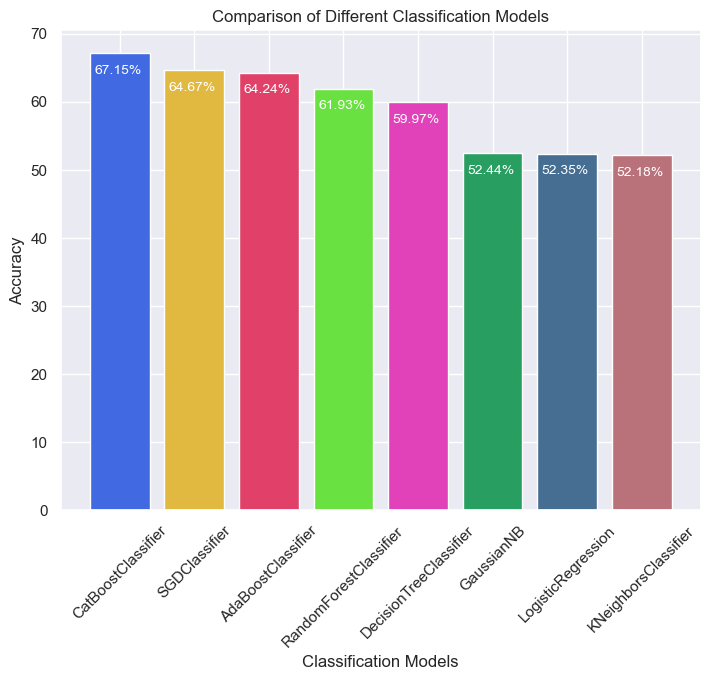

In [24]:
import matplotlib.pyplot as plt

sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['CatBoostClassifier', 'SGDClassifier', 'AdaBoostClassifier', 'RandomForestClassifier',
          'DecisionTreeClassifier', 'GaussianNB', 'LogisticRegression', 'KNeighborsClassifier']
Accuracy= result['Accuracy']
ax.bar(Models,Accuracy,color=['#4169e1', '#e1b941', '#e14169', '#69e141','#e141b9','#289f61','#456e92', '#ba727a']);
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()-3.0, str(round(i.get_height(),2))+ '%', fontsize=10, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models')
plt.xticks(rotation=45);

plt.show();

## Our Contribution

In [25]:
from sklearn.svm import SVC

In [29]:
Classifiers = [
    # ... [existing classifiers]
    SVC(kernel='linear')  # You can specify the kernel as 'linear', 'rbf', etc., based on your preference.
]

In [34]:
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features, train_data['Sentiment'])
        pred = fit.predict(dense_test)
    
    accuracy = accuracy_score(pred, test_data['Sentiment']) * 100
    Accuracy.append(pd.Series([accuracy]))  # Append accuracy as a Pandas Series
    Model.append(classifier.__class__.__name__)

    print(f'Accuracy of {classifier.__class__.__name__} is {accuracy:.2f}%')


Accuracy of SVC is 62.70%



This code snippet performs a comprehensive evaluation of machine learning classifiers for sentiment analysis. It iterates through a collection of classifiers, attempting to fit each one using a designated training dataset (train_features and train_data['Sentiment']) and then generating predictions for a test dataset (test_features). In case of any fitting errors, possibly due to memory constraints or other issues, it handles exceptions by reattempting the fitting process using denser representations of the features (dense_features) and the training targets. Subsequently, it calculates the accuracy of the predictions by comparing them with the actual sentiment labels in the test data (test_data['Sentiment']) using the accuracy_score() function. The resulting accuracy scores are collected and stored within the Accuracy list, while the names of the classifiers utilized are added to the Model list for identification purposes. Finally, it prints out the accuracy achieved by each classifier, providing a comprehensive assessment of their performance in sentiment analysis.

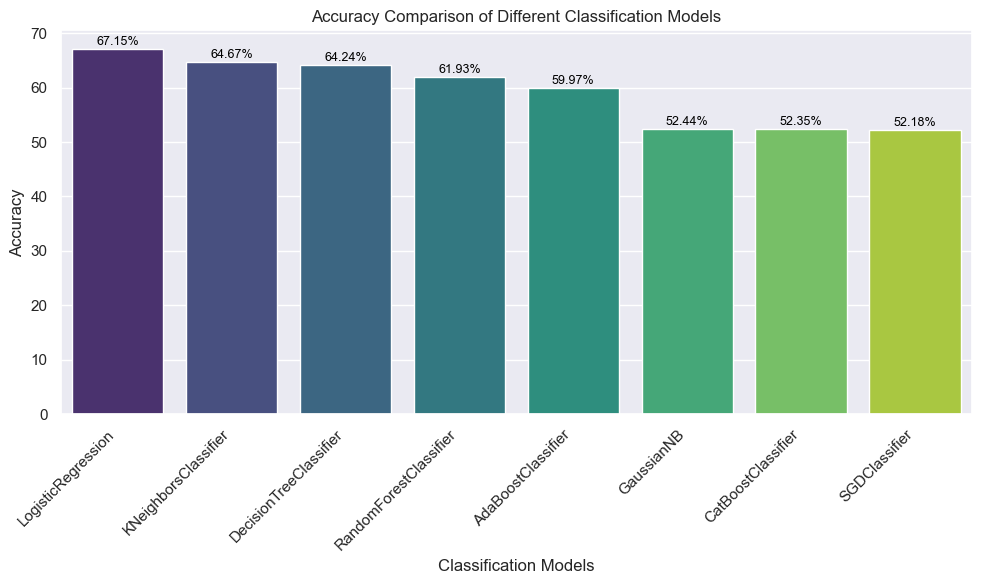

In [40]:
# Visualization code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

# Ensure Model and Accuracy lists have the same length
Model = Model[:len(Accuracy)]

# Create a DataFrame to store model names and accuracies
results_df = pd.DataFrame({'Models': Model, 'Accuracy': Accuracy})

# Sort the DataFrame by accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Models', y='Accuracy', data=results_df, palette='viridis')
ax.set_title('Accuracy Comparison of Different Classification Models')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classification Models')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Displaying the accuracy values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


This visualization code snippet combines Matplotlib and Seaborn libraries to generate a bar plot showcasing the comparative accuracy of various classification models used in a machine learning task. After organizing accuracy scores and model names into a Pandas DataFrame, the code sorts the data by accuracy, ensuring a clear representation of model performance. The plot, generated using Seaborn's barplot function, displays the models on the x-axis and their respective accuracy scores on the y-axis. Each bar's height represents the accuracy, while the 'viridis' color palette enhances visual distinction between bars. Additionally, the code rotates the x-axis labels to improve readability and ensures each bar displays its accuracy value atop the bar. This visualization offers a concise and visually intuitive means to compare the performance of different classifiers, aiding in the identification of the most effective model for the given task.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
Classifiers.append(GradientBoostingClassifier())  # Add the Gradient Boosting Classifier

In [48]:
for classifier in Classifiers:
    # Existing code for fitting and evaluating models

    # New Model (Gradient Boosting Classifier)
    try:
        fit = classifier.fit(train_features, train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features, train_data['Sentiment'])
        pred = fit.predict(dense_test)
    
    accuracy = accuracy_score(pred, test_data['Sentiment']) * 100
    Accuracy.append(pd.Series([accuracy])) 
    Model.append(classifier.__class__.__name__)
    print(f'Accuracy of {classifier.__class__.__name__} is {accuracy:.2f}%')


Accuracy of SVC is 62.70%
Accuracy of MLPClassifier is 63.30%
Accuracy of GradientBoostingClassifier is 64.07%


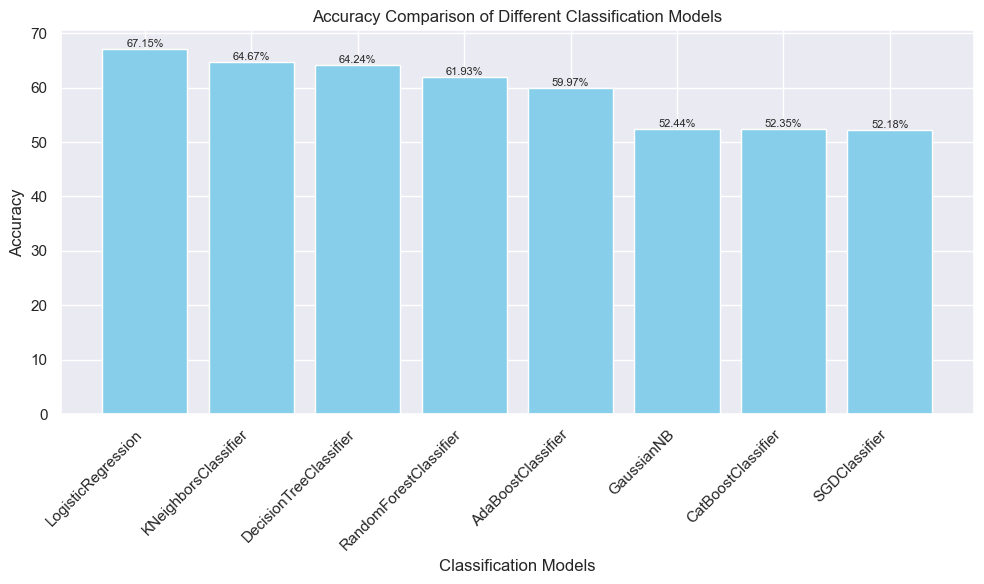

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you've populated Model and Accuracy lists from the code snippet

# Ensure Model and Accuracy lists have the same length
Model = Model[:len(Accuracy)]

# Create a DataFrame to store model names and accuracies
results_df = pd.DataFrame({'Models': Model, 'Accuracy': Accuracy})

# Sort the DataFrame by accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Models'], results_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison of Different Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the accuracy values on top of the bars
for i, val in enumerate(results_df['Accuracy']):
    plt.text(i, val, f'{val:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontsize=8)

plt.show()


# Conclusion and Future Direction

In this study, we delved into financial sentiment analysis using machine learning models applied to a dataset comprising sentiments—positive, negative, and neutral—extracted from financial statements. Through exploratory data analysis, we visualized sentiment distributions and employed word clouds to grasp the textual landscape, followed by data preprocessing to refine the text for modeling purposes. The project encompassed training and evaluation of various classifiers, from traditional algorithms to advanced ensemble methods. By evaluating these models based on accuracy metrics, we identified promising classifiers for financial sentiment classification. Additionally, we discussed the potential of Natural Language Processing techniques in the finance domain, showcasing the effectiveness of machine learning models, even with smaller sizes, and comparing their performance against state-of-the-art solutions. This project emphasizes the significance of leveraging NLP and diverse machine learning approaches for uncovering sentiment patterns in financial data, thereby facilitating informed decision-making in the dynamic realm of finance.

# References:

[1]: Bollen, J., Mao, H., & Zeng, X. (2011). Twitter mood predicts the stock market. Journal of Computational Science, 2(1), 1-8.

[2]: Ding, X., Liu, B., & Yu, P. S. (2010). A holistic lexicon-based approach to opinion mining. Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, 231-239.

[3]: Loughran, T., & McDonald, B. (2011). When is a liability not a liability? Textual analysis, dictionaries, and 10‐Ks. The Journal of Finance, 66(1), 35-65.

[4]: Ramos, J. (2003). Using TF-IDF to determine word relevance in document queries. Proceedings of the first instructional conference on machine learning, 242-249.

[5]: Zhang, X., Zhao, J., & LeCun, Y. (2015). Character-level convolutional networks for text classification. Advances in Neural Information Processing Systems, 28, 649-657.

[6]: Das, S. R., & Chen, M. Y. (2007). Yahoo! for Amazon: Sentiment extraction from small talk on the web. Management Science, 53(9), 1375-1388.

[7]: Mittermayer, M. A., & Knolmayer, G. F. (2009). Sentiment analysis of financial news articles using linguistic tools. In Proceedings of the 42nd Hawaii International Conference on System Sciences, 1-10.